# Introduction

<img src="churn.jpeg">

<p>Predict customer churn for credit card companny base on given features.
You can use Machine Learning as well as Deep LEarning techniques to produce some meaningfull outputs.
This dataset very basic and can be used for basic understanding.</p>


# Import

In [1]:
# For Begining
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Adding Section
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Dataset

In [2]:
# Load dataset using pandas.read_csv()

df = pd.read_csv("Churn.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ol>
    <li>How many row and columns in dataset ?</li>
    <li>There is any NaN Value, Missing Value, or Duplicated Value ?</li>
    <li>What types of dataset ?</li>
    <li>Checking For Correlations </li>
</ol>


In [3]:
print(f"Churt dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\n")
print(f"Is there any NaN Value in Dataset ?\n{df.isna().sum()}")
print("\n")
print(f"Is there any duplicate values ? {df.duplicated().sum()}")

Churt dataset has 10000 rows and 11 columns


Is there any NaN Value in Dataset ?
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Is there any duplicate values ? 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

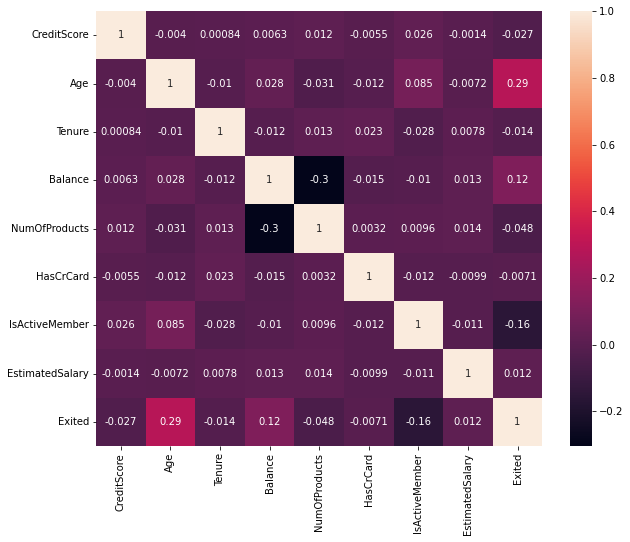

In [6]:
# print(df.corr())
plt.figure(figsize=(10,8))
heat_corr = sns.heatmap(df.corr(), annot=True)
heat_corr

In [7]:
# Covariance
# cov = np.cov(df.T)
# print(cov)

# # STD 
# stds = np.std(df, axis=0)

# stds_matrix = np.array([[stds[i]*stds[j] for j in range(len(df.shape[1]))] for i in range(len(df.shape[1]))])

# print("standard deviations matrix of shape:",stds_matrix.shape)



<AxesSubplot:title={'center':'Correlation between data'}>

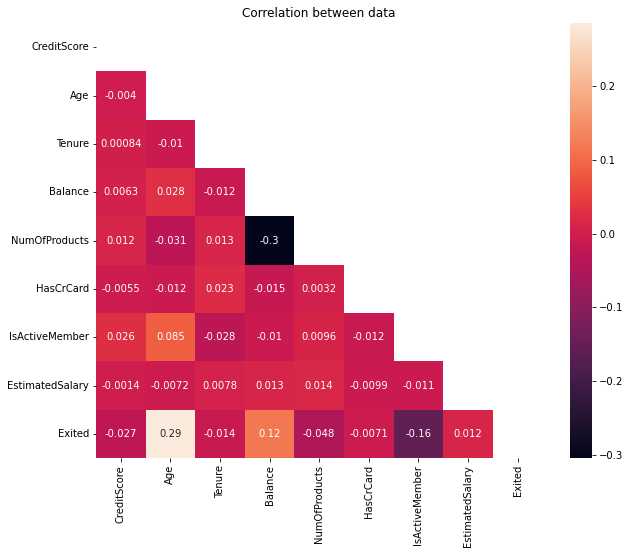

In [8]:
plt.figure(figsize=(10,8))
plt.title("Correlation between data")
mask = np.triu(np.ones_like(df.corr()))
tri_corr = sns.heatmap(df.corr(), annot=True, mask=mask)
tri_corr 

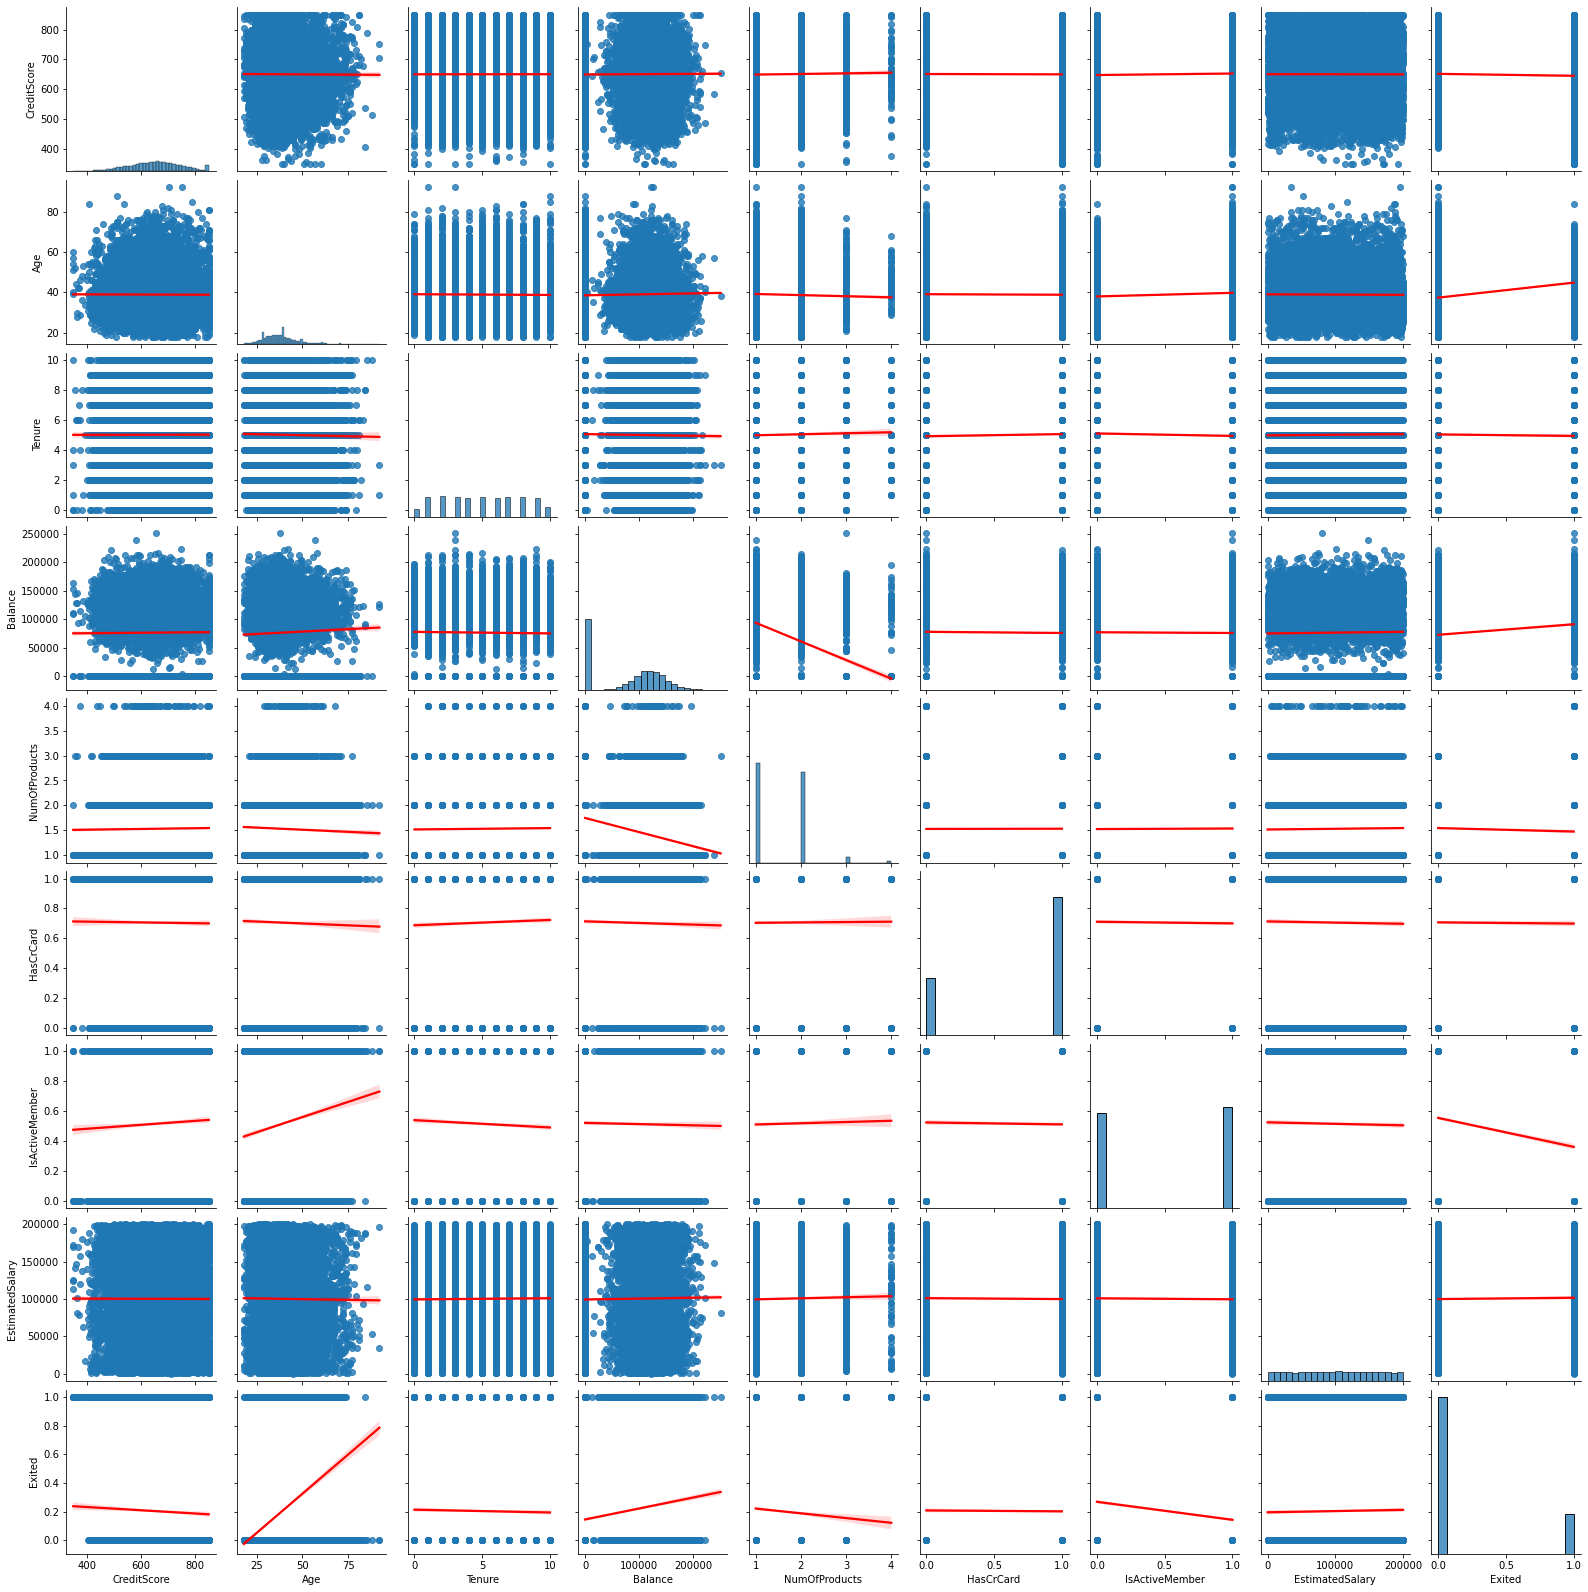

Wall time: 1min 20s


In [9]:
%%time

sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

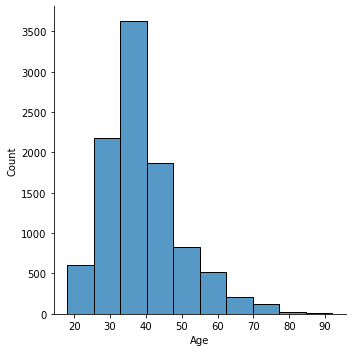

In [10]:
sns.displot(df['Age'], bins=10)

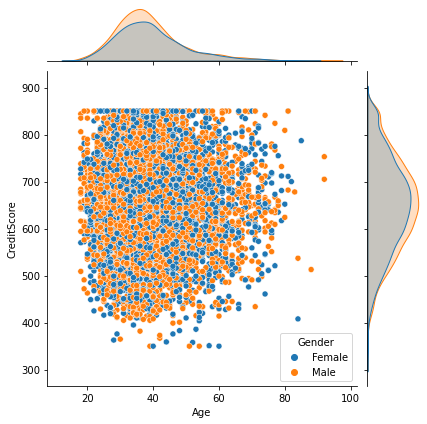

In [11]:
sns.jointplot(data=df,x="Age",y="CreditScore", hue="Gender")

Text(0.5, 1.0, 'CREDIT SCORE')

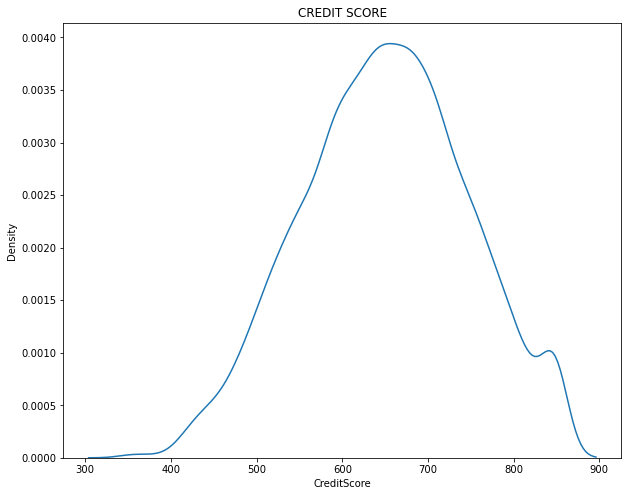

In [12]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x="CreditScore")
plt.title("CREDIT SCORE")


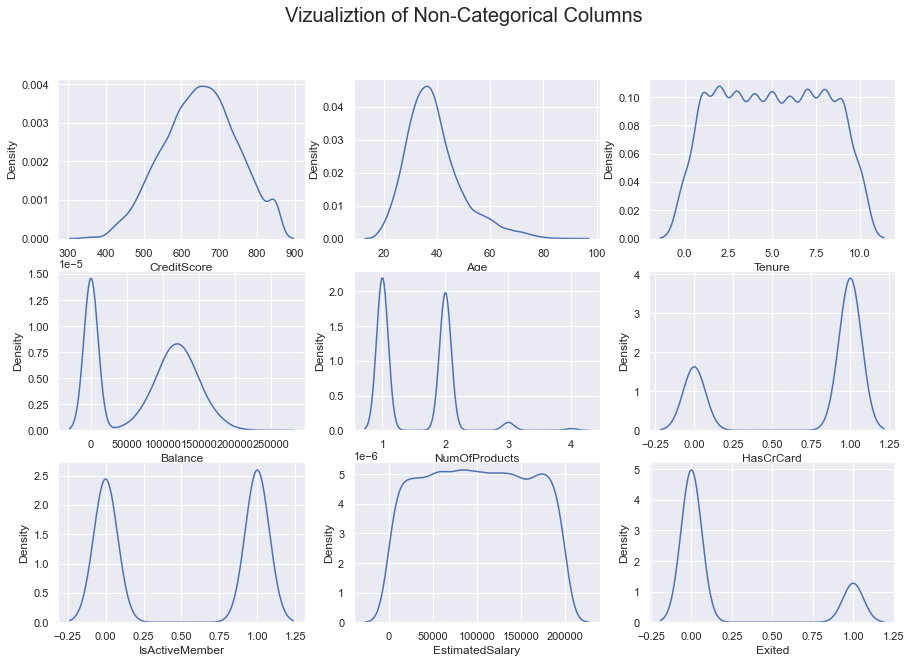

In [13]:
int_col = []
sns.set()

plt.figure(figsize=(15,10))
plt.suptitle("Vizualiztion of Non-Categorical Columns", fontsize=20)

for col in df.columns:
    if df[col].dtypes == "int64" :
        int_col.append(col)
    elif df[col].dtypes =='float64' :
        int_col.append(col)

for n, col in enumerate(int_col):
    axs = plt.subplot(3,3,n+1)
    sns.kdeplot(data=df, x=col, ax=axs)
    plt.xlabel(col)
    



In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
countries = df["Geography"].value_counts()
countries

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
bar_countries = px.bar(countries, x=countries.index, y=countries.values, title="Number of Countries")
bar_countries.update_layout()
bar_countries.show()

In [17]:
gender = df["Gender"].value_counts()
bar_gender = px.bar(gender, x=gender.index, y=gender.values, title="Number of Gender")
bar_gender.update_layout()
bar_gender.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


new_df = pd.get_dummies(data=df, columns=["Geography","Gender"], drop_first=True)
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
x = new_df.drop("Exited", axis=1)
y = new_df["Exited"]
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Modeling Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=212)

regr = LinearRegression()

regr.fit(X_train, y_train)
print("Intercept", regr.intercept_)
print("Training Data R-Squared", regr.score(X_train, y_train))
print("Test data R-Squared", regr.score(X_test, y_test))

Intercept -0.14280496005916177
Training Data R-Squared 0.14693774218873168
Test data R-Squared 0.15693840887955823


In [22]:
reg_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test,reg_pred)
print(mae)

0.28380476160739926


In [23]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CreditScore,-5.214182e-05
Age,1.112158e-02
Tenure,-1.141336e-03
Balance,3.568786e-07
NumOfProducts,1.511230e-03
HasCrCard,-6.948583e-03
IsActiveMember,-1.333405e-01
EstimatedSalary,5.739475e-08
Geography_Germany,1.210495e-01
Geography_Spain,1.486970e-03


In [32]:
log_regr = LogisticRegression()

log_regr.fit(X_train, y_train)
print("Intercept", log_regr.intercept_)
print("Training Data R-Squared", log_regr.score(X_train, y_train))
print("Test data R-Squared", log_regr.score(X_test, y_test))
pred_log = log_regr.predict(X_test)
print("MAE :", mean_absolute_error(y_test, pred_log))

Intercept [-0.00020753]
Training Data R-Squared 0.791
Test data R-Squared 0.7883333333333333
MAE : 0.21166666666666667


In [25]:
pd.DataFrame(data=log_regr.coef_[0], index=X_train.columns, columns=['coef'])

,coef
CreditScore,-0.004973
Age,0.042827
Tenure,-0.001454
Balance,0.000004
NumOfProducts,-0.000216
HasCrCard,-0.000258
IsActiveMember,-0.001311
EstimatedSalary,-0.000001
Geography_Germany,0.000946
Geography_Spain,-0.000370


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
try_pipeline = Pipeline([('std_scaller', StandardScaler()),('log_reg', LogisticRegression())])

try_pipeline.fit(X_train, y_train)
print("Training Data R-Squared", try_pipeline.score(X_train, y_train))
print("Test data R-Squared", try_pipeline.score(X_test, y_test))

Training Data R-Squared 0.8122857142857143
Test data R-Squared 0.809


In [28]:
pd.DataFrame(
    {'Training Data R-Squared':[log_regr.score(X_train, y_train),try_pipeline.score(X_train, y_train)], 
    'Test Data R-Squared':[log_regr.score(X_test, y_test),try_pipeline.score(X_test, y_test)]},
    index=['Data Without Scaller', 'Data used Scaller']
)

,Training Data R-Squared,Test Data R-Squared
Data Without Scaller,0.791000,0.788333
Data used Scaller,0.812286,0.809000


In [29]:
ridge = RidgeClassifier()
ridge_pipe = Pipeline([('std_scaler', StandardScaler()), ('ridge', RidgeClassifier())])

ridge.fit(X_train, y_train)
print("Intercept", ridge.intercept_)
print("Training Data R-Squared", ridge.score(X_train, y_train))
print("Test data R-Squared", ridge.score(X_test, y_test))


ridge_pipe.fit(X_train, y_train)
print("Training Data R-Squared", ridge_pipe.score(X_train, y_train))
print("Test data R-Squared", ridge_pipe.score(X_test, y_test))

Intercept [-1.28572507]
Training Data R-Squared 0.808
Test data R-Squared 0.799
Training Data R-Squared 0.8081428571428572
Test data R-Squared 0.799


In [30]:
pd.DataFrame(
    {'Training Data R-Squared':[ridge.score(X_train, y_train),ridge_pipe.score(X_train, y_train)], 
    'Test Data R-Squared':[ridge.score(X_test, y_test),ridge_pipe.score(X_test, y_test)]},
    index=['Data Without Scaller', 'Data used Scaller']
)

,Training Data R-Squared,Test Data R-Squared
Data Without Scaller,0.808000,0.799
Data used Scaller,0.808143,0.799


In [31]:
pd.DataFrame(data=ridge.coef_[0], index=X_train.columns, columns=['coef'])

,coef
CreditScore,-1.043075e-04
Age,2.224299e-02
Tenure,-2.282012e-03
Balance,7.144362e-07
NumOfProducts,3.042298e-03
HasCrCard,-1.388415e-02
IsActiveMember,-2.665313e-01
EstimatedSalary,1.148111e-07
Geography_Germany,2.418581e-01
Geography_Spain,2.899702e-03
